##### <h1>Deep Learning Workshop</h1>
<br>
<a href="http://home.cse.shirazu.ac.ir/~m.valipour/">Mojtaba Valipour</a> @ Shiraz University

<h5>Session 1 + Code Session </h5>
<div style="float:right;margin:0 10px 10px 0" markdown="1">
![tfImage](elements/images/tensorflow.png)
</div>
<p><strong><span class="a"></span></strong> <span class="b"></span> <span></span></p>

<img src="elements/images/kidding.jpg" alt="Drawing" align="middle" style="width: 800px;"/>

TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Googleâ€™s Machine Intelligence research organization.

TensorFlow is a way of representing computation without actually performing it until asked.

In [1]:
x = 10
y = x + 1
print(y)

11


In [6]:
import tensorflow as tf

x = tf.constant(10, name='x')
y = tf.Variable(x + 1, name='y')

print(y)

Tensor("y/read:0", shape=(), dtype=int32)


In [7]:
import tensorflow as tf

Import the tensorflow module and call it tf

In [8]:
x = tf.constant(10, name='x')

Create a constant value called x, and give it the numerical value 10

In [9]:
y = tf.Variable(x + 1, name='y')

Create a Variable called y, and define it as being the equation x + 1

In [10]:
print(y)

Tensor("y_1/read:0", shape=(), dtype=int32)


Print out the equation object for y

## How to solve that? 

In [12]:
import tensorflow as tf

x = tf.constant(10, name='x')
y = tf.Variable(x + 1, name='y')

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

11


In [ ]:
model = tf.global_variables_initializer()

Initialize the variables with initialize_all_variables 


In [ ]:
session.run(model)

Run the model created in previous step

### Advantages: 

* Faster computation of complex variables

* Distributed computation across multiple systems, including GPUs.

* Reduced redundency in some computations

## What is variable in TensorFlow? 

Variables are in-memory buffers containing tensors.

## What is tensor? 

Formally, tensors are multilinear maps from vector spaces to the real numbers

$$f: \underbrace{V^* \times \cdots  V^*} \times \underbrace{V \times  \cdots V}  \rightarrow \Re \hspace{10pt}$$

 where V is vector space and $V^*$ is dual space 

A scaler is a tensor $$f: \Re \rightarrow \Re, f(e_1) = c$$

A Vector is a tensor $$f: \Re^n \rightarrow \Re, f(e_i) = v_i$$

A Matrix is a tensor $$f: \Re^n \times \Re^m \rightarrow \Re, f(e_i,e_j) = A_{ij}$$

so a tensor can be represented as a multidimensional array of numbers.

* TensorFlow programs use a tensor data structure to represent all data. You can think of a TensorFlow tensor as an n-dimensional array or list. A tensor has a static type and dynamic dimensions. Only tensors may be passed between nodes in the computation graph.

* Tensors are described by a unit of dimensionality known as rank. Tensor rank is not the same as matrix rank.

![tfImage](elements/images/1.png)

Three notational conventions to describe tensor dimensionality: 
* rank
* shape 
* dimension number

![tfImage2](elements/images/2.png)

![tfImage](elements/images/3.png)

## Remember: 

tf.Variable(initial-value, name=optional-name) 

tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False) 

### Examples: 

In [27]:
a = tf.constant([2,2], name='aConstant')
print(a)

Tensor("aConstant:0", shape=(2,), dtype=int32)


## What is a Session in TensorFlow?

A class for running TensorFlow operations. A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.

TensorFlow does not actually run any computation until 

* the session is created 

In [28]:
sess = tf.Session()

and 

* the run function is called

In [29]:
print(sess.run(a))

[2 2]


### Create a Session: 
    

In [35]:
sess = tf.Session()
sess.as_default()
# sess.run(...)
sess.close() # release resources

In [32]:
# use context manager
with tf.Session() as sess:
    pass
    # sess.run(..)

In [33]:
sess = tf.InteractiveSession()

* The only difference with a regular Session is that an InteractiveSession installs itself as the default session on construction. 

* This is convenient in interactive shells and IPython notebooks, as it avoids having to pass an explicit Session object to run ops.

### Examples: 

In [37]:
sess = tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(4.0)
c = a * b
print(c.eval()) # We can just use 'c.eval()' without passing 'sess'
sess.close()

20.0


In [53]:
# Add more examples

## Placeholder

* A placeholder is simply a variable that we will assign data to at a later date. 

* It allows us to create our operations and build our computation graph, without needing the data.

* In TensorFlow terminology, we then feed data into the graph through these placeholders.

```tf.placeholder(dtype, shape=None, name=None)```

In [55]:
import tensorflow as tf

x = tf.placeholder("float", 3)
y = x * 4

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[  4.   8.  12.]


In [59]:
import tensorflow as tf

First, we import tensorflow as normal.

In [60]:
x = tf.placeholder("float", 3)

* Then we create a placeholder called x, i.e. a place in memory where we will store value later on. 
* The 3 on this line denotes that we will store three values in this placeholder.

In [61]:
y = x * 4

Then, we create a Tensor called, which is the operation of multiplying x by 4.

In [62]:
with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[  4.   8.  12.]


* Running y requires knowledge about the values of x. 
* We define these inside the feed_dict argument to run.

In [66]:
x = tf.placeholder("float", None) # arbitary value

In [70]:
import tensorflow as tf

x = tf.placeholder("float", None)
y = x * 4

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3, 4]})
    print(result)

[  4.   8.  12.  16.]


## Operators: 

### Arithmetic Operators

In [85]:
sess = tf.InteractiveSession()
x = tf.ones([2, 3], tf.int32)
print(x)
y = tf.constant([[1,1,1],[2,2,2]])
print(y.eval())
z = tf.add(x, y, name='sampleAdder')
print(z.eval())

Tensor("ones_13:0", shape=(2, 3), dtype=int32)
[[1 1 1]
 [2 2 2]]
[[2 2 2]
 [3 3 3]]


* tf.subtract(x, y, name=None)
* tf.multiply(x, y, name=None) # Element wise
* tf.div(x, y, name=None) # Element wise
* tf.mod(x, y, name=None) # Returns element-wise remainder of division.

### Basic Math Functions

In [82]:
sess = tf.InteractiveSession()
x = -1 * tf.ones([2, 3], tf.int32)
print(x.eval())
z = tf.abs(x, name="absSample")
print(z.eval())

[[-1 -1 -1]
 [-1 -1 -1]]
[[1 1 1]
 [1 1 1]]


In [86]:
sess = tf.InteractiveSession()
x = tf.constant([[2, 2], [3, 3]])
y = tf.constant([[1, 4], [5, 3]])
z = tf.pow(x, y)
print(z.eval())

[[  2  16]
 [243  27]]


* tf.sign(x, name=None)
* tf.square(x, name=None)
* tf.negative(x, name=None)
* tf.round(x, name=None) 
* tf.exp(x, name=None) 
* tf.tan(x, name=None) 
* tf.squared_difference(x, y, name=None)

### Matrix Math Functions

* tf.matmul(a, b, transpose_a=False, transpose_b=False, adjoint_a=False, adjoint_b=False, a_is_sparse=False, b_is_sparse=False, name=None)

In [88]:
import numpy as np
sess = tf.InteractiveSession()
a = tf.constant(np.arange(1, 13, dtype=np.int32),
                shape=[2, 2, 3])                
b = tf.constant(np.arange(13, 25, dtype=np.int32),
                shape=[2, 3, 2])                
c = tf.matmul(a, b) 
print(c.eval())

[[[ 94 100]
  [229 244]]

 [[508 532]
  [697 730]]]


* tf.norm(tensor, ord='euclidean', axis=None, keep_dims=False, name=None)
* tf.matrix_inverse(input, adjoint=None, name=None)
* tf.matrix_solve(matrix, rhs, adjoint=None, name=None)
* tf.svd(tensor, full_matrices=False, compute_uv=True, name=None)
* tf.diag(diagonal, name=None)
* tf.trace(x, name=None)
* tf.transpose(a, perm=None, name='transpose')

### Other Operators:


* tf.argmax(input, axis=None, name=None, dimension=None)
* tf.reduce_sum(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
* tf.reduce_mean(input_tensor, axis=None, keep_dims=False, name=None, reduction_indices=None)
* tf.count_nonzero(input_tensor, axis=None, keep_dims=False, dtype=tf.int64, name=None, reduction_indices=None)

### Activation Functions 

The activation ops provide different types of nonlinearities for use in neural networks

Smooth Nonlinearities: 
* sigmoid
* tanh
* elu
* softplus
* softsign

Continuous but not everywhere differentiable functions:
* relu
* relu6
* crelu
* relu_x

Random Regularization:
* dropout

In [ ]:
# add pictures for activation functions here

In [90]:
# input -> Model -> Output

In [93]:
# input data for mnist
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Load and Downlaod Mnist Dataset to the local computer

In [102]:
def displayDigit(image, label, num):
    label = label.argmax(axis=0)
    image = image.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def displayMultFlat(dataset, start, stop):
    images = dataset[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, dataset[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

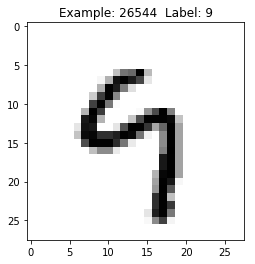

In [104]:
import numpy as np
import matplotlib.pyplot as plt

random = np.random.randint(0, 55000)
image = mnist.train.images[random,:]
label = mnist.train.labels[random,:]
displayDigit(image, label, random)

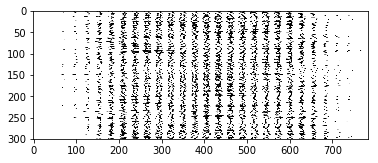

In [105]:
displayMultFlat(mnist.train.images[0:300,:], 0, 300)

<img src="elements/images/convnetFig.png" alt="Convolution Net" align="middle" style="width: 700px;"/>

<img src="elements/images/convInputFig.jpg" alt="Convolution Net" align="middle" style="width: 700px;"/>

In [122]:
x = tf.placeholder(tf.float32, [None, 784]) # input

<img src="elements/images/convNetFig2.jpg" alt="Convolution Net" align="middle" style="width: 700px;"/>

In [123]:
y = tf.placeholder(tf.float32, [None, 10]) # Ground Truth

<img src="elements/images/convNetFig3.jpg" alt="Convolution Net" align="middle" style="width: 700px;"/>

In [124]:
wFC1 = tf.Variable(tf.random_normal([784, 1024]))
bFC1 = tf.Variable(tf.random_normal([1024]))

fc1 = tf.add(tf.matmul(x, wFC1), bFC1)
fc1 = tf.nn.relu(fc1)

# output
wOut = tf.Variable(tf.random_normal([1024, 10]))
bOut = tf.Variable(tf.random_normal([10]))

output = tf.add(tf.matmul(fc1, wOut), bOut) 

In [125]:
# train the network
pred = output

In [127]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [128]:
# Evaluate model
correctPred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [129]:
# Initializing the variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
numTrain = 5500
numTest = 1000

In [130]:
for i in range(5):
    sess.run(optimizer, feed_dict={x: mnist.train.images[:numTrain,:], y: mnist.train.labels[:numTrain,:]})
    print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: mnist.test.images[:numTest,:], y: mnist.test.labels[:numTest,:]})) + '  Loss = ' + str(sess.run(cost, {x: mnist.test.images[:numTest,:], y: mnist.test.labels[:numTest,:]})))

Training Step:0  Accuracy =  0.044  Loss = 255.756
Training Step:1  Accuracy =  0.05  Loss = 240.343
Training Step:2  Accuracy =  0.05  Loss = 225.946
Training Step:3  Accuracy =  0.058  Loss = 212.393
Training Step:4  Accuracy =  0.069  Loss = 199.614


In [131]:
# train again with mini batch
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
wFC1 = tf.Variable(tf.random_normal([784, 1024]))
bFC1 = tf.Variable(tf.random_normal([1024]))

fc1 = tf.add(tf.matmul(x, wFC1), bFC1)
fc1 = tf.nn.relu(fc1)

In [133]:
# output
wOut = tf.Variable(tf.random_normal([1024, 10]))
bOut = tf.Variable(tf.random_normal([10]))

output = tf.add(tf.matmul(fc1, wOut), bOut) 

pred = output
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
correctPred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [134]:
batchSize = 10
numEpoch = 5
numTrain = 5500
numTest = 1000
for i in range(numEpoch): # epoch
    for j in range(numTrain//batchSize): #mini batch
        batchX, batchY = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batchX, y: batchY})
    print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: mnist.test.images[:numTest,:], y: mnist.test.labels[:numTest,:]})) + '  Loss = ' + str(sess.run(cost, {x: mnist.test.images[:numTest,:], y: mnist.test.labels[:numTest,:]})))

Training Step:0  Accuracy =  0.789  Loss = 20.7055
Training Step:1  Accuracy =  0.841  Loss = 14.8445
Training Step:2  Accuracy =  0.875  Loss = 11.1198
Training Step:3  Accuracy =  0.882  Loss = 9.9271
Training Step:4  Accuracy =  0.911  Loss = 8.7142


In [113]:
import tensorflow as tf
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

<img src="elements/images/convNetFig4.jpg" alt="Convolution Net" align="middle" style="width: 700px;"/>

tf.nn.conv2d(input, filter, strides, padding, use_cudnn_on_gpu=None, data_format=None, name=None)

In [114]:
wC1 = tf.Variable(tf.random_normal([5, 5, 1, 32]))
bC1 = tf.Variable(tf.random_normal([32]))

In [ ]:
stride = 1
xReshap = tf.reshape(x, shape=[-1, 28, 28, 1])
conv1 = tf.nn.conv2d(xReshap, wC1, strides=[1, stride, stride, 1], padding='SAME')
conv1 = tf.nn.bias_add(conv1, bC1)
conv1 = tf.nn.relu(conv1)

<img src="elements/images/convNetFig5.jpg" alt="Convolution Net" align="middle" style="width: 700px;"/>

tf.nn.max_pool(value, ksize, strides, padding, data_format='NHWC', name=None)

In [115]:
kernelSize = 2 # max pooling
conv1 = tf.nn.max_pool(conv1, ksize=[1, kernelSize, kernelSize, 1], strides=[1, kernelSize, kernelSize, 1],
                          padding='SAME')

<img src="elements/images/convNetFig6.jpg" alt="Convolution Net" align="middle" style="width: 700px;"/>

In [116]:
wC2 = tf.Variable(tf.random_normal([5, 5, 32, 64]))
bC2 = tf.Variable(tf.random_normal([64]))

stride = 1
conv2 = tf.nn.conv2d(conv1, wC2, strides=[1, stride, stride, 1], padding='SAME')
conv2 = tf.nn.bias_add(conv2, bC2)
conv2 = tf.nn.relu(conv2)

kernelSize = 2
conv2 = tf.nn.max_pool(conv2, ksize=[1, kernelSize, kernelSize, 1], strides=[1, kernelSize, kernelSize, 1],
                          padding='SAME')

In [117]:
fc1 = tf.reshape(conv2, [-1, 64*7*7])
print(fc1.get_shape())

(?, 3136)


In [118]:
wFC1 = tf.Variable(tf.random_normal([3136, 1024]))
bFC1 = tf.Variable(tf.random_normal([1024]))

In [119]:
fc1 = tf.add(tf.matmul(fc1, wFC1), bFC1)
fc1 = tf.nn.relu(fc1)

# output
wOut = tf.Variable(tf.random_normal([1024, 10]))
bOut = tf.Variable(tf.random_normal([10]))

output = tf.add(tf.matmul(fc1, wOut), bOut) 

pred = output
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
correctPred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [120]:
batchSize = 10
numEpoch = 5
numTrain = 5500
numTest = 1000
for i in range(numEpoch): # epoch
    for j in range(numTrain//batchSize): #mini batch
        batchX, batchY = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batchX, y: batchY})
    print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: mnist.test.images[:numTest,:], y: mnist.test.labels[:numTest,:]})) + '  Loss = ' + str(sess.run(cost, {x: mnist.test.images[:numTest,:], y: mnist.test.labels[:numTest,:]})))

Training Step:0  Accuracy =  0.866  Loss = 1967.55
Training Step:1  Accuracy =  0.883  Loss = 1396.77
Training Step:2  Accuracy =  0.908  Loss = 1205.98
Training Step:3  Accuracy =  0.902  Loss = 1170.08
Training Step:4  Accuracy =  0.938  Loss = 609.471


### Optimizers

* Gradient Descent
* Ada Delta
* Ada Grad
* Momentum
* Proximal Gradient Descent
* RMS Prop

#source: Justin Francis
![tfImage](elements/images/justinFrancis.gif)

In [17]:
import tensorflow as tf

x = tf.constant(10, name='x')
y = tf.Variable(x + 1, name='y')

with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./tmp/basic", session.graph)
    model =  tf.global_variables_initializer()
    session.run(model)
    print(session.run(y))

11


```bash
tensorboard --logdir=./tmp/basic
```

# Refrences:

https://www.tensorflow.org

http://learningtensorflow.com

https://cs224d.stanford.edu/lectures/CS224d-Lecture7.pdf


https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow

https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/convolutional_network.ipynb

https://github.com/gwding/draw_convnet